<a href="https://colab.research.google.com/github/marcelodepaoli/Controle/blob/main/Par%C3%A2metros_da_resposta_ao_degrau.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install control

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 7.2 MB/s eta 0:00:00


In [2]:
import control as ctl
import matplotlib.pyplot as plt
import numpy as np

In [12]:
#função para calcular as grandezas da resposta no tempo
#CUIDADO, para funcionar o tempo de simulação deve ser grande o suficiente
def my_step_info(t,y):
  peak_time = t[np.argmax(y)]
  overshot = (y.max()/y[-1] - 1)*100
  for i in range(0, len(y)-1):
    if (y[i] > y[-1]*0.10):
      i_10 = i
      break
  for i in range(0, len(y)-1):
    if (y[i] > y[-1]*0.90):
      i_90 = i
      break
  rise_time = t[i_90] - t[i_10]
  for i in range(2, len(y)-1):
    if (abs(y[-i]/y[-1]) > 1.02) or (abs(y[-i]/y[-1]) < 0.98):
      qts = i
      break
  settling_time = t[len(y)-qts]
  return peak_time, overshot, rise_time, settling_time

In [14]:
#cria a função de transferência
T_sim = 10
T = np.linspace(-1, T_sim, 1000)

H_s = ctl.tf([9], [1, 3, 9])
print('FT = ', H_s)

T_mf, yout_mf = ctl.step_response(H_s, T[T>0])
pt, os, rt, st = my_step_info(T_mf, yout_mf)

print('peak time = {:0.2f} s'.format(pt))
print('overshoot = {:0.2f} %'.format(os))
print('rise time = {:0.2f} s'.format(rt))
print('settling time = {:0.2f} s'.format(st))

FT =  
      9
-------------
s^2 + 3 s + 9

peak time = 1.21 s
overshoot = 16.30 %
rise time = 0.55 s
settling time = 2.69 s


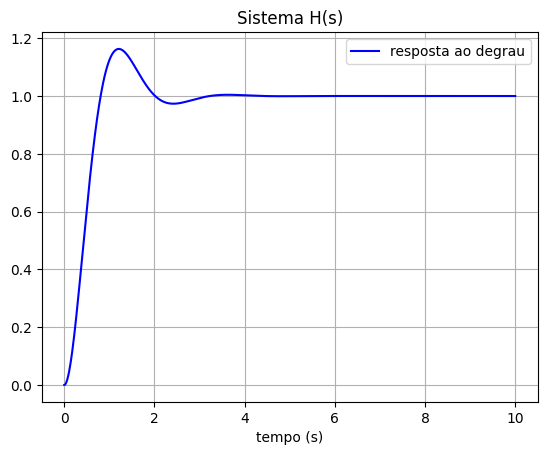

In [15]:
#plota os resultados
plt.figure()
plt.plot(T_mf, yout_mf, 'b-')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau'])
plt.title('Sistema H(s)')
plt.grid()

In [16]:
#cria a função de transferência
T_sim = 30
T = np.linspace(-1, T_sim, 1000)

H_s = ctl.tf([4], [1, 0.8, 4])
print('FT = ', H_s)

T_mf, yout_mf = ctl.step_response(H_s, T[T>0])
pt, os, rt, st = my_step_info(T_mf, yout_mf)

print('peak time = {:0.2f} s'.format(pt))
print('overshoot = {:0.2f} %'.format(os))
print('rise time = {:0.2f} s'.format(rt))
print('settling time = {:0.2f} s'.format(st))

FT =  
       4
---------------
s^2 + 0.8 s + 4

peak time = 1.64 s
overshoot = 52.65 %
rise time = 0.59 s
settling time = 9.80 s


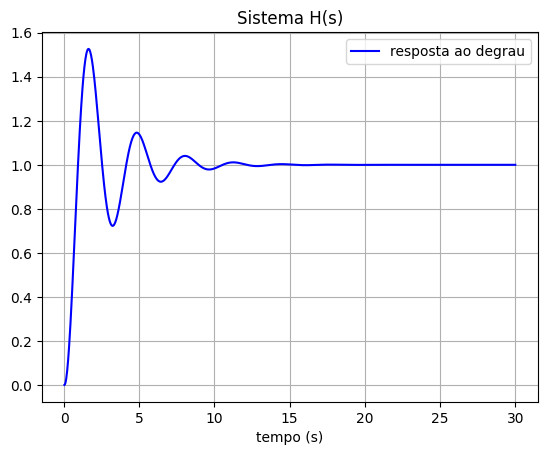

In [17]:
#plota os resultados
plt.figure()
plt.plot(T_mf, yout_mf, 'b-')
plt.xlabel('tempo (s)')
plt.legend(['resposta ao degrau'])
plt.title('Sistema H(s)')
plt.grid()